[**The link for the tutorial**](https://www.youtube.com/watch?v=2JiXktBn_2M)

In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

np.set_printoptions(threshold=sys.maxsize)

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)) / predictions.shape[0])

**Example Program**

In [0]:
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

In [0]:
# graph = tf.Graph()
# with graph.as_default():

#   batch_size = 128
#   beta = .001
#   image_size = 28
#   num_labels = 10

#   tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_size * image_size))
#   tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
#   tf_valid_dataset = tf.constant(mnist.validation.images)
#   tf_test_dataset = tf.constant(mnist.test.images)

#   w_logit = tf.Variable(tf.truncated_normal([image_size * image_size, num_labels]))
#   b_logit = tf.Variable(tf.zeros([num_labels]))

#   def model(data):
#     return tf.matmul(data, w_logit) + b_logit

#   logits = model(tf_train_dataset)
#   loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=tf_train_labels))
#   regularized_loss = tf.nn.l2_loss(w_logit) 
#   total_loss = loss + beta + regularized_loss

#   optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(total_loss)

#   train_prediction = tf.nn.softmax(logits)
#   valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
#   test_prediction = tf.nn.softmax(model(tf_test_dataset))

In [0]:
# num_step = 1001

# with tf.Session(graph=graph) as session:
#   tf.global_variables_initializer().run()
#   print("initialized")

#   for step in range(num_step):
#     batch_data, batch_labels = mnist.train.next_batch(batch_size=batch_size)
#     feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}

#     _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)

#     if (step % 500 == 0):
#       print("minibatch loss at step %d: %f" % (step, l))
#       print("minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
#       print("validation accuracy: %.1f%%" % accuracy(valid_prediction.eval(), mnist.validation.labels))
#       print("\n")
  
#   print("test accuracy: %.1f%%" % accuracy(test_prediction.eval(), mnist.test.labels))

**Actual Program**

In [0]:
data_frame = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Content-Based Recommender System Data/Hypothesis Data/data-16-fv-tf-idf-scores-7561-row-9-class-200-feature.csv', header=None, sep=',')
data_frame.shape

(7561, 1566)

In [0]:
header = []

for i in range(len(data_frame.columns)-1):
  header.append(str(i))

header.append('target')

data_frame.columns = header
data_frame.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '1556', '1557', '1558', '1559', '1560', '1561', '1562', '1563', '1564',
       'target'],
      dtype='object', length=1566)

,counts
journal_id,
8,2644
0,763
1,754
4,640
5,600
2,599
3,536
6,525
7,500


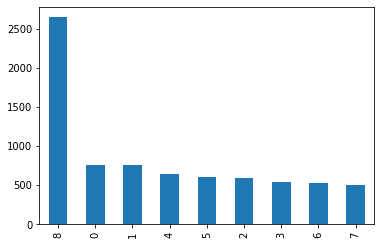

In [0]:
value_counts = data_frame['target'].value_counts()
value_counts.plot(kind='bar')
value_counts.rename_axis('journal_id').to_frame('counts')

In [0]:
data_labels = data_frame['target']
data_features = data_frame.drop('target',axis=1)

near_miss = NearMiss(random_state=42)
x_undersampled, y_undersampled = near_miss.fit_sample(data_features, data_labels)

print(x_undersampled.shape)
print(y_undersampled.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

(4500, 1565)
(4500,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
data_features_df = pd.DataFrame(data = x_undersampled[0:,0:], 
                                index = [i for i in range(x_undersampled.shape[0])],
                                columns = [str(i) for i in range(x_undersampled.shape[1])])

data_labels_df = pd.DataFrame(data = y_undersampled[0:], 
                                index = [i for i in range(y_undersampled.shape[0])],
                                columns = ['target'])

data_frame_undersampled = data_features_df.join(data_labels_df)

print(data_features_df.head())
print(data_labels_df.head())
print(data_frame_undersampled.head())

          0    1         2         3         4  ...  1560  1561  1562  1563  1564
0  0.000000  0.0  0.000000  0.000000  0.000000  ...   0.0   0.0   0.0   0.0   0.0
1  0.306853  0.0  0.000000  0.000000  0.000000  ...   0.0   0.0   0.0   0.0   0.0
2  0.306853  0.0  0.000000  0.000000  0.000000  ...   0.0   0.0   0.0   0.0   0.0
3  0.613706  0.0  0.306853  0.306853  0.613706  ...   0.0   0.0   0.0   0.0   0.0
4  0.613706  0.0  0.000000  0.000000  0.000000  ...   0.0   0.0   0.0   0.0   0.0

[5 rows x 1565 columns]
   target
0       0
1       0
2       0
3       0
4       0
          0    1         2         3         4  ...  1561  1562  1563  1564  target
0  0.000000  0.0  0.000000  0.000000  0.000000  ...   0.0   0.0   0.0   0.0       0
1  0.306853  0.0  0.000000  0.000000  0.000000  ...   0.0   0.0   0.0   0.0       0
2  0.306853  0.0  0.000000  0.000000  0.000000  ...   0.0   0.0   0.0   0.0       0
3  0.613706  0.0  0.306853  0.306853  0.613706  ...   0.0   0.0   0.0   0.0       0
4  

,counts
journal_id,
7,500
3,500
6,500
2,500
5,500
1,500
8,500
4,500
0,500


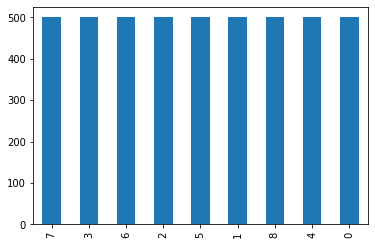

In [0]:
value_counts_undersampled = data_labels_df['target'].value_counts()
value_counts_undersampled.plot(kind='bar')
value_counts_undersampled.rename_axis('journal_id').to_frame('counts')

In [0]:
data_frame_shuffled_once = data_frame_undersampled.sample(frac=1)
data_frame_shuffled_four = data_frame_shuffled_once.sample(frac=1)
data_frame_shuffled_twice = data_frame_shuffled_four.sample(frac=1)
data_frame_shuffled_twice.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563,1564,target
2431,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.306853,0.0,0.000000,0.0,0.0,4
777,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.613706,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1
1039,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.920558,0.0,0.0,2
2438,0.306853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.613706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,4
3854,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,7


In [0]:
data_train, data_test = train_test_split(data_frame_shuffled_twice, test_size = 0.2)

data_train_features = data_train.drop('target',axis=1)
data_train_labels = data_train['target']

data_test_features = data_test.drop('target',axis=1)
data_test_labels = data_test['target']

In [0]:
batch_size = 128
beta = .001
learning_rate = 0.001
num_epoch = 101
num_features = 1565
num_labels = 9

In [0]:
def to_onehot(y):
  data = np.zeros((num_labels))
  data[y] = 1
  return data

data_train_labels_one_hot_encoded = np.array([to_onehot(label) for label in data_train_labels])
data_test_labels_one_hot_encoded = np.array([to_onehot(label) for label in data_test_labels])

print(data_train_labels_one_hot_encoded.shape)
print(data_test_labels_one_hot_encoded.shape)

(3600, 9)
(900, 9)


In [0]:
graph = tf.Graph()

with graph.as_default():

  tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, num_features))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_test_dataset = tf.constant(data_test_features, dtype=tf.float32)

  w_logit = tf.Variable(tf.truncated_normal([num_features, num_labels]))
  b_logit = tf.Variable(tf.zeros([num_labels]))

  def model(data):
    return tf.matmul(data, w_logit) + b_logit

  logits = model(tf_train_dataset)
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=tf_train_labels))
  regularized_loss = tf.nn.l2_loss(w_logit) 
  total_loss = loss + beta + regularized_loss

  optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(total_loss)

  train_prediction = tf.nn.softmax(logits)
  test_prediction = tf.nn.softmax(model(tf_test_dataset))

initialized
epoch: 0
minibatch loss: 5.017694
minibatch accuracy: 7.8%


epoch: 1
minibatch loss: 4.764601
minibatch accuracy: 7.8%


epoch: 2
minibatch loss: 4.528933
minibatch accuracy: 7.8%


epoch: 3
minibatch loss: 4.309780
minibatch accuracy: 7.8%


epoch: 4
minibatch loss: 4.106274
minibatch accuracy: 7.8%


epoch: 5
minibatch loss: 3.917588
minibatch accuracy: 7.8%


epoch: 6
minibatch loss: 3.742923
minibatch accuracy: 7.8%


epoch: 7
minibatch loss: 3.581515
minibatch accuracy: 7.8%


epoch: 8
minibatch loss: 3.432625
minibatch accuracy: 8.6%


epoch: 9
minibatch loss: 3.295541
minibatch accuracy: 8.6%


epoch: 10
minibatch loss: 3.169573
minibatch accuracy: 8.6%


epoch: 11
minibatch loss: 3.054056
minibatch accuracy: 9.4%


epoch: 12
minibatch loss: 2.948341
minibatch accuracy: 8.6%


epoch: 13
minibatch loss: 2.851804
minibatch accuracy: 8.6%


epoch: 14
minibatch loss: 2.763836
minibatch accuracy: 8.6%


epoch: 15
minibatch loss: 2.683851
minibatch accuracy: 8.6%


epoch:

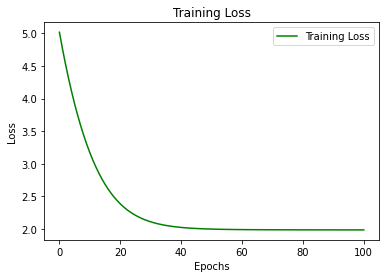

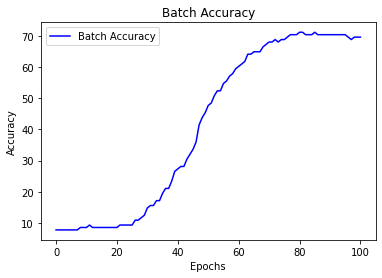

test accuracy: 51.2%


In [0]:
with tf.Session(graph=graph) as session:
  tf.global_variables_initializer().run()
  print("initialized")

  avg_batch_loss_list = []
  batch_accuracy_list = []
  total_batch = len(data_frame)//batch_size

  for epoch in range(num_epoch):

    total_loss = 0

    for i in range(total_batch):

      batch_data = data_train_features[i:i+1*batch_size]
      batch_labels = data_train_labels_one_hot_encoded[i:i+1*batch_size]

      feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
      _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)

      total_loss += l

      if (i == total_batch - 1):
        batch_accuracy = accuracy(predictions, batch_labels)
        batch_accuracy_list.append(batch_accuracy)

        avg_batch_loss = total_loss / total_batch
        avg_batch_loss_list.append(avg_batch_loss)
        
        print("epoch: %d" % epoch)
        print("minibatch loss: %f" % avg_batch_loss)
        print("minibatch accuracy: %.1f%%" % batch_accuracy)
        print("\n")

  epochs_range = range(0, num_epoch)

  plt.plot(epochs_range, avg_batch_loss_list, 'g', label='Training Loss')
  plt.title('Training Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(epochs_range, batch_accuracy_list, 'b', label='Batch Accuracy')
  plt.title('Batch Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  print("test accuracy: %.1f%%" % accuracy(test_prediction.eval(), data_test_labels_one_hot_encoded))